In [3]:
import pandas as pd

In [65]:
# juntar os 5 arquivos
df1 = pd.read_excel("/content/drive/MyDrive/Datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/Datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/Datasets/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/Datasets/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/Datasets/Salvador.xlsx")
print("Aracaju:{}".format(len(df1)))
print("Fortaleza:{}".format(len(df2)))
print("Natal:{}".format(len(df3)))
print("Recife:{}".format(len(df4)))
print("Salvador:{}".format(len(df5)))

Aracaju:130
Fortaleza:142
Natal:240
Recife:142
Salvador:240


In [66]:
# juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])
print("Total dps de juntar = {}".format(len(df)))

Total dps de juntar = 894


In [33]:
# amostras
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
145,Salvador,2019-01-02,84.62,1034,2
84,Fortaleza,2019-01-01,147.46,1003,6
85,Fortaleza,2019-01-01,149.00,1005,3
43,Salvador,2019-01-01,12.21,1034,1
46,Aracaju,2018-01-01,41.42,1522,2


In [47]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [67]:
# como alterar tipo de dados
# lojaid - mudando de int64 para Object
df["LojaID"] = df["LojaID"].astype("object")
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [49]:
# consultar linhas com valores faltantes (nulos)
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [44]:
# Replace valores nulls
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde
118,Aracaju,2018-01-01,3.34,1522,1
96,Salvador,2019-01-01,42.94,1034,3
225,Natal,2019-01-02,36.23,1035,1
33,Recife,2019-01-01,32.33,982,1
105,Recife,2019-01-01,41.12,980,3
201,Natal,2019-01-02,86.61,1036,1
28,Aracaju,2018-01-01,114.93,1520,5
66,Recife,2019-01-01,14.59,983,7
51,Recife,2019-01-01,146.95,982,2
31,Natal,2018-04-03,401.00,854,4


In [68]:
# criar nova coluna o df
df["Receita"] = df["Vendas"].mul(df["Qtde"])
df 

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08
...,...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1,41.84
236,Salvador,2019-01-03,126.29,1035,3,378.87
237,Salvador,2019-01-03,38.06,1036,3,114.18
238,Salvador,2019-01-03,139.64,1035,1,139.64


In [51]:
df["Receita"].max()

3544.0

In [52]:
df["Receita"].min()

3.34

In [53]:
# ideia = Top 3
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [55]:
# ideia = Down 3
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [56]:
df.groupby("Cidade").sum("Receita")

,Vendas,Qtde,Receita
Cidade,,,
Aracaju,9472.98,674,48748.25
Fortaleza,10120.71,550,37913.97
Natal,59187.76,549,167227.52
Recife,11119.10,667,51936.51
Salvador,19714.40,476,40596.73


In [57]:
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


**Trabalhando com Datas no Pandas Aula 



In [69]:
# transformando Data para Inteiro
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [78]:
df["Data"] = df["Data"].astype("int64")
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [77]:
df["Data"].sample(10)

125   2019-03-02
237   2019-01-03
43    2019-04-01
104   2019-01-02
77    2018-01-01
56    2019-01-01
13    2018-09-12
161   2019-01-02
224   2019-01-02
4     2019-03-09
Name: Data, dtype: datetime64[ns]

In [81]:
# de Inteiro para Datetime
df["Data"] = pd.to_datetime(df["Data"])
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [83]:
# Agrupamento por Ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [85]:
# criar coluna uma nova coluna
df["ano"] = df["Data"].dt.year
df["ano"]

0      2018
1      2018
2      2018
3      2018
4      2018
       ... 
235    2019
236    2019
237    2019
238    2019
239    2019
Name: ano, Length: 894, dtype: int64

In [87]:
df["mes"] = df["Data"].dt.month
df["mes"]

0      1
1      1
2      1
3      1
4      1
      ..
235    1
236    1
237    1
238    1
239    1
Name: mes, Length: 894, dtype: int64

In [89]:
df["dia"] = df["Data"].dt.day
df["dia"]

0      1
1      1
2      1
3      1
4      1
      ..
235    3
236    3
237    3
238    3
239    3
Name: dia, Length: 894, dtype: int64

In [90]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,ano,mes,dia
7,Recife,2019-02-11,33.37,982,3,100.11,2019,2019,2,11
129,Fortaleza,2019-03-02,35.34,982,7,247.38,2019,2019,3,2
77,Aracaju,2018-01-01,24.10,1522,1,24.10,2018,2018,1,1
135,Recife,2019-03-02,10.79,983,5,53.95,2019,2019,3,2
149,Natal,2019-01-02,22.38,1034,3,67.14,2019,2019,1,2
76,Salvador,2019-01-01,39.51,1035,3,118.53,2019,2019,1,1
8,Aracaju,2019-01-01,12.16,1523,1,12.16,2019,2019,1,1
4,Aracaju,2018-01-01,24.51,1522,8,196.08,2018,2018,1,1
214,Salvador,2019-01-02,54.94,1036,2,109.88,2019,2019,1,2
133,Fortaleza,2019-03-02,14.67,980,7,102.69,2019,2019,3,2


In [92]:
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [94]:
df["Data"].max()

Timestamp('2019-04-05 00:00:00')

In [96]:
df["Dif Dias"] = df["Data"] - df["Data"].min()
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,ano,mes,dia,Dif Dias
100,Natal,2019-01-02,190.97,1036,2,381.94,2019,2019,1,2,366 days
233,Salvador,2019-01-03,172.40,1036,2,344.80,2019,2019,1,3,367 days
62,Recife,2019-01-01,23.04,983,6,138.24,2019,2019,1,1,365 days
92,Recife,2019-01-01,163.02,981,4,652.08,2019,2019,1,1,365 days
113,Recife,2019-03-02,38.63,980,2,77.26,2019,2019,3,2,425 days
22,Aracaju,2018-01-01,150.94,1522,1,150.94,2018,2018,1,1,0 days
133,Salvador,2019-03-02,153.71,1035,1,153.71,2019,2019,3,2,425 days
127,Salvador,2019-03-02,240.61,1035,3,721.83,2019,2019,3,2,425 days
157,Salvador,2019-01-02,150.17,1036,2,300.34,2019,2019,1,2,366 days
99,Salvador,2019-01-01,40.38,1037,1,40.38,2019,2019,1,1,365 days


In [97]:
df.dtypes

Cidade                object
Data          datetime64[ns]
Vendas               float64
LojaID                object
Qtde                   int64
Receita              float64
Ano_Venda              int64
ano                    int64
mes                    int64
dia                    int64
Dif Dias     timedelta64[ns]
dtype: object

In [100]:
# criar coluna Trimestre
df["trimestre"] = df["Data"].dt.quarter
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,ano,mes,dia,Dif Dias,trimestre
25,Recife,2019-01-01,161.60,982,5,808.00,2019,2019,1,1,365 days,1
60,Natal,2018-05-02,534.00,852,3,1602.00,2018,2018,5,2,121 days,2
104,Recife,2019-01-01,40.11,983,5,200.55,2019,2019,1,1,365 days,1
99,Salvador,2019-01-01,40.38,1037,1,40.38,2019,2019,1,1,365 days,1
68,Natal,2018-06-22,274.00,852,3,822.00,2018,2018,6,22,172 days,2
46,Aracaju,2018-01-01,41.42,1522,2,82.84,2018,2018,1,1,0 days,1
231,Natal,2019-01-03,89.85,1034,2,179.70,2019,2019,1,3,367 days,1
147,Salvador,2019-01-02,34.50,1035,1,34.50,2019,2019,1,2,366 days,1
46,Salvador,2019-01-01,34.84,1034,3,104.52,2019,2019,1,1,365 days,1
14,Fortaleza,2019-01-12,132.68,1005,1,132.68,2019,2019,1,12,376 days,1


In [108]:
# Vendas de 03/2019
vendas_marco_19 = df.loc[(df["Data"].dt.year==2019) & (df["Data"].dt.month==3)]
vendas_marco_19.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,ano,mes,dia,Dif Dias,trimestre
124,Salvador,2019-03-02,44.82,1034,3,134.46,2019,2019,3,2,425 days,1
69,Natal,2019-03-24,817.00,852,4,3268.00,2019,2019,3,24,447 days,1
119,Fortaleza,2019-03-02,152.30,982,7,1066.10,2019,2019,3,2,425 days,1
132,Salvador,2019-03-02,19.61,1036,2,39.22,2019,2019,3,2,425 days,1
125,Recife,2019-03-02,37.60,983,4,150.40,2019,2019,3,2,425 days,1
113,Salvador,2019-03-02,18.90,1034,3,56.70,2019,2019,3,2,425 days,1
137,Recife,2019-03-02,51.99,983,3,155.97,2019,2019,3,2,425 days,1
125,Salvador,2019-03-02,25.00,1037,2,50.00,2019,2019,3,2,425 days,1
130,Recife,2019-03-02,12.36,983,4,49.44,2019,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,2019,3,2,425 days,1


In [110]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

**Visualização de Dados**

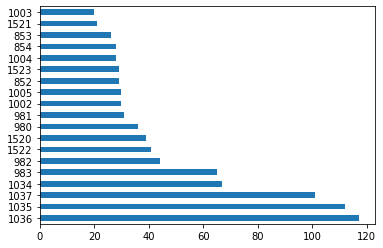

In [111]:
df["LojaID"].value_counts(ascending=False).plot.barh()

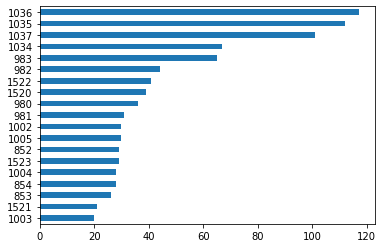

In [113]:
df["LojaID"].value_counts(ascending=True).plot.barh()

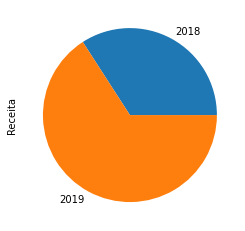

In [114]:
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [115]:
# Total  Vendas por Cidade
df["Cidade"].value_counts()

Salvador     240
Natal        240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

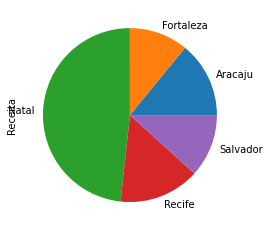

In [116]:
df.groupby(df["Cidade"])["Receita"].sum().plot.pie()

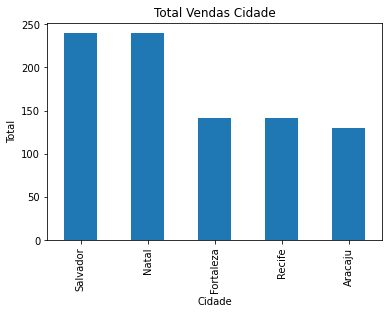

In [118]:
# Adicionando um título e alterando os eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total Vendas Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total");

Text(0, 0.5, 'Total Vendas')

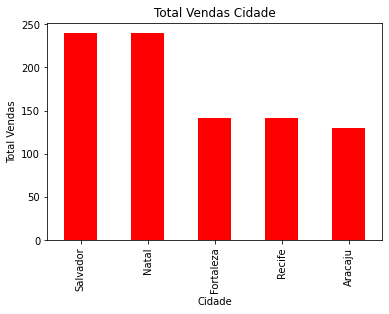

In [119]:
df["Cidade"].value_counts().plot.bar(title="Total Vendas Cidade", color="Red")
plt.xlabel("Cidade")plt.ylabel("Total Vendas")

In [121]:

### alterando estilos do grafico ###
### matplotlib.org  -- documentacao

plt.style.use("ggplot")

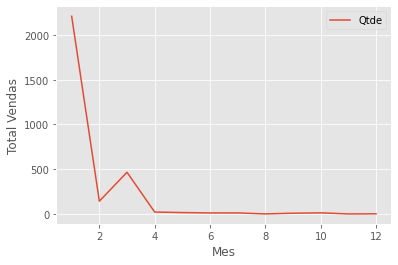

In [122]:
df.groupby(df["mes"])["Qtde"].sum().plot()
plt.xlabel("Mes")
plt.ylabel("Total Vendas")
plt.legend()

In [124]:
df.groupby(df["mes"])["Qtde"].sum()

mes
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [127]:
df_2019 = df[df['Ano_Venda'] == 2019]
df_2019

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,ano,mes,dia,Dif Dias,trimestre
7,Aracaju,2019-01-01,172.22,1522,6,1033.32,2019,2019,1,1,365 days,1
8,Aracaju,2019-01-01,12.16,1523,1,12.16,2019,2019,1,1,365 days,1
9,Aracaju,2019-01-01,149.36,1523,3,448.08,2019,2019,1,1,365 days,1
10,Aracaju,2019-01-01,42.34,1522,6,254.04,2019,2019,1,1,365 days,1
11,Aracaju,2019-01-01,161.53,1520,4,646.12,2019,2019,1,1,365 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1,41.84,2019,2019,1,3,367 days,1
236,Salvador,2019-01-03,126.29,1035,3,378.87,2019,2019,1,3,367 days,1
237,Salvador,2019-01-03,38.06,1036,3,114.18,2019,2019,1,3,367 days,1
238,Salvador,2019-01-03,139.64,1035,1,139.64,2019,2019,1,3,367 days,1


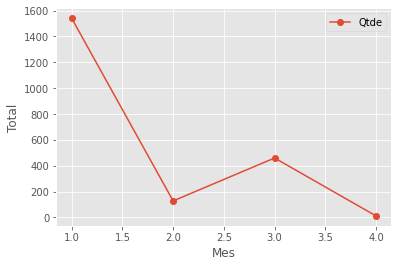

In [130]:
# Tot Vend mes
df_2019.groupby(df_2019["mes"]) ["Qtde"].sum().plot(marker = 'o')
plt.xlabel("Mes")
plt.ylabel("Total")
plt.legend()

(array([191., 193., 221.,  85.,  54.,  61.,  38.,  31.,  14.,   6.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

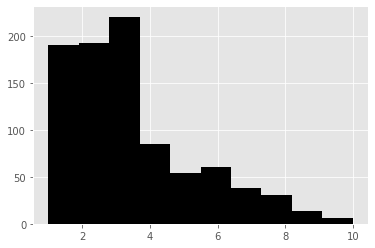

In [131]:
# Historgrama
plt.hist(df["Qtde"], color="Black")

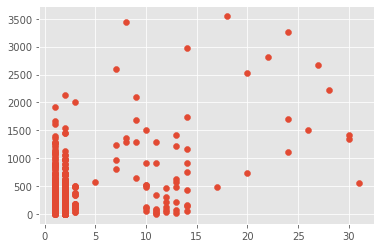

In [132]:
plt.scatter( x = df_2019["dia"], y = df_2019["Receita"] );

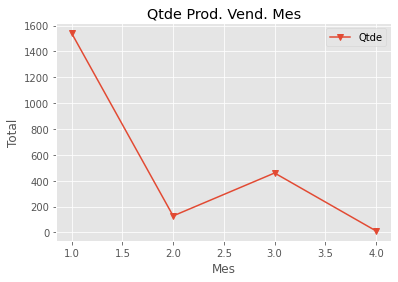

In [134]:
# salvando em png
df_2019.groupby(df_2019["mes"])["Qtde"].sum().plot(marker = "v")
plt.title("Qtde Prod. Vend. Mes")
plt.xlabel("Mes")
plt.ylabel("Total")
plt.legend()
plt.savefig("/content/drive/MyDrive/Datasets/grafico Qtde x Mes.png")